In [52]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [53]:
# Carregar o conjunto de dados 'train.csv'
df = pd.read_csv('train.csv')

In [54]:
# Selecionar algumas características numéricas para a análise de outlier
features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
X = df[features]

In [55]:
# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Criação de uma instância do algoritmo LOF
lof = LocalOutlierFactor(n_neighbors=20)


In [57]:
# Ajuste do modelo aos dados e previsão dos rótulos dos outliers
y_pred = lof.fit_predict(X_scaled)

In [58]:
# Adicionar as previsões ao DataFrame original
df['Outlier'] = y_pred

In [59]:
# Filtrar os outliers
outliers = df[df['Outlier'] == -1]
non_outliers = df[df['Outlier'] == 1]

In [60]:
# Imprimir os outliers
print(outliers[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'Outlier']])

      LotArea  GrLivArea  TotalBsmtSF  GarageArea  Outlier
29       6324        520          520         240       -1
53      50271       1842         1842         894       -1
70      13651       2223         2223         516       -1
78      10778       1768         1768           0       -1
98      10625        835          458         366       -1
...       ...        ...          ...         ...      ...
1423    19690       2201          697         432       -1
1430    21930       1838          732         372       -1
1440    11526       2555          588         672       -1
1446    26142       1188         1188         312       -1
1453    17217       1140         1140           0       -1

[103 rows x 5 columns]


In [61]:
# Criando um dicionário para guardar os dados de cada grupo (outlier ou não outlier)
groups_data = {1: [], -1: []}
for i in range(len(df)):
    groups_data[y_pred[i]].append(df['SalePrice'].iloc[i])

In [62]:
# Contando a frequência de ocorrência dos outliers em cada grupo
outliers_freq = [0, 0]
for i in groups_data[-1]:
    if i <= df['SalePrice'].median():
        outliers_freq[0] += 1
    else:
        outliers_freq[1] += 1

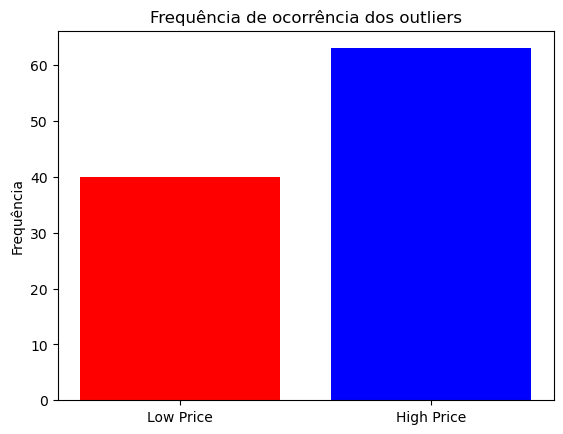

In [63]:
# Gerando o gráfico de barras
fig, ax = plt.subplots()
ax.bar(np.arange(2), outliers_freq, color=['red', 'blue'])
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Low Price', 'High Price'])
ax.set_ylabel('Frequência')
ax.set_title('Frequência de ocorrência dos outliers')
plt.show()

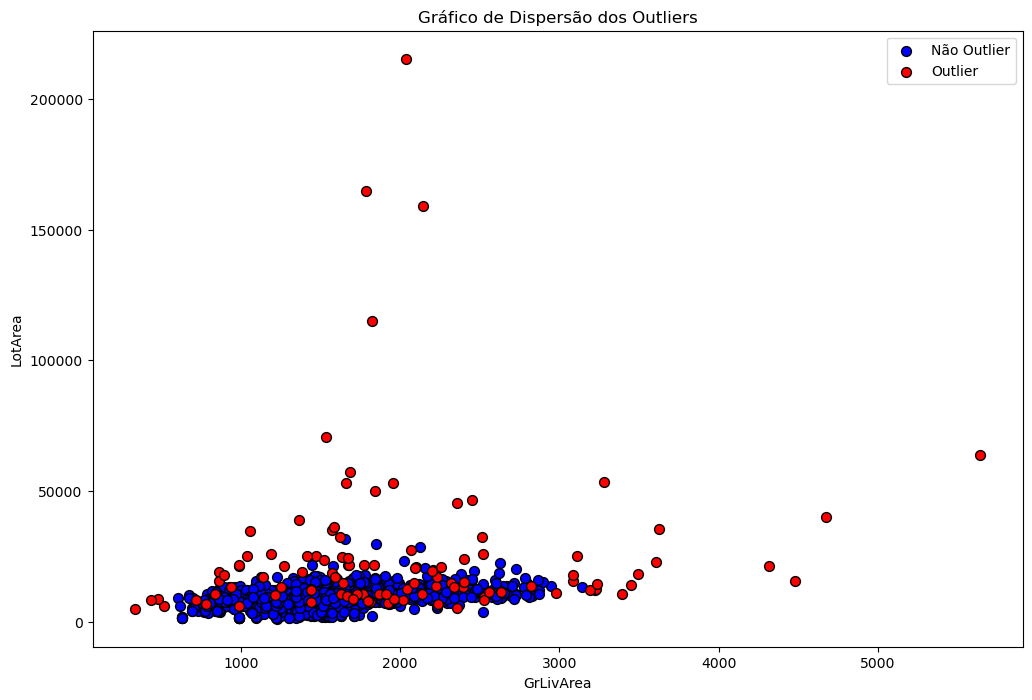

In [64]:
# Gerando o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(non_outliers['GrLivArea'], non_outliers['LotArea'], c='blue', label='Não Outlier', edgecolor='k', s=50)
plt.scatter(outliers['GrLivArea'], outliers['LotArea'], c='red', label='Outlier', edgecolor='k', s=50)
plt.xlabel('GrLivArea')
plt.ylabel('LotArea')
plt.title('Gráfico de Dispersão dos Outliers')
plt.legend()
plt.show()